In [1]:
library(ggplot2)
library(ggtree)
library(grid)
library(gridExtra)
library(cowplot)

Loading required package: treeio
ggtree v1.8.2  For help: https://guangchuangyu.github.io/ggtree

If you use ggtree in published research, please cite:
Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36, doi:10.1111/2041-210X.12628

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
black = "black"
blue = "#439FC3"
green = "#76A88D"
orange = "#F9842A"
red = "#B52A24"
pink = "#CC79A7"
purple = "#8E7790"

small_color = '#f76ab4'
nucleophilic_color = '#ff7f00'
hydrophobic_color = '#12ab0d'
aromatic_color = '#84380b'
acidic_color = '#3c58e5'
amide_color = '#972aa8'
basic_color = '#e41a1c'
functionalGroup = make_col_scheme(chars=c('G', 'A', 'S', 'T', 'C', 'V', 'L', 'I', 'M', 'P', 'F', 'Y', 'W', 'D', 'E', 'H', 'K', 'R', 'N', 'Q'), 
                                  cols=c(small_color, small_color, nucleophilic_color, nucleophilic_color, nucleophilic_color, hydrophobic_color,hydrophobic_color,hydrophobic_color,hydrophobic_color,hydrophobic_color, aromatic_color,aromatic_color,aromatic_color, acidic_color, acidic_color, basic_color, basic_color, basic_color,amide_color,amide_color))


ERROR: Error in make_col_scheme(chars = c("G", "A", "S", "T", "C", "V", "L", : could not find function "make_col_scheme"


In [23]:
#### Trees (General)
group_tip_names <- function(groups,tip_names) {
  target_groups <- unlist(lapply(groups, function(x) paste("HA_HA_", x, "$",sep = ""))) # which group names to look for?
  matches <- apply(sapply(target_groups, grepl, tip_names, ignore.case=TRUE), 1, any) # which tip names have those group names
  matches <- sapply(tip_names[matches], paste0, collapse="") # subset the matches
  return(matches)
}

make_tree <- function(fname, name, colorScale){
  tree <- read.tree(fname)
  
  # set up the groups for colors 
  tip_names = get.tree(tree)$tip.label

  
  color_groups <- list(high=group_tip_names(c(1, 2,5, 6), tip_names),
                       intermediate=group_tip_names(c(8, 9, 11, 13, 16), tip_names),
                       low=group_tip_names(c(4,3,10,7,14), tip_names))
  tree <- groupOTU(tree, focus=color_groups)
  
  # ggtree(tree, aes(color=group), layout="unrooted") 
  p <- ggtree(tree, aes(color=group), size=.75) + colorScale + ggtitle(name) + theme_tree2() + scale_x_continuous(limits = c(0, 11)) 
  p  <- p + geom_vline(xintercept=3) + geom_vline(xintercept=4) + geom_vline(xintercept=5)
  
  return(p)
}


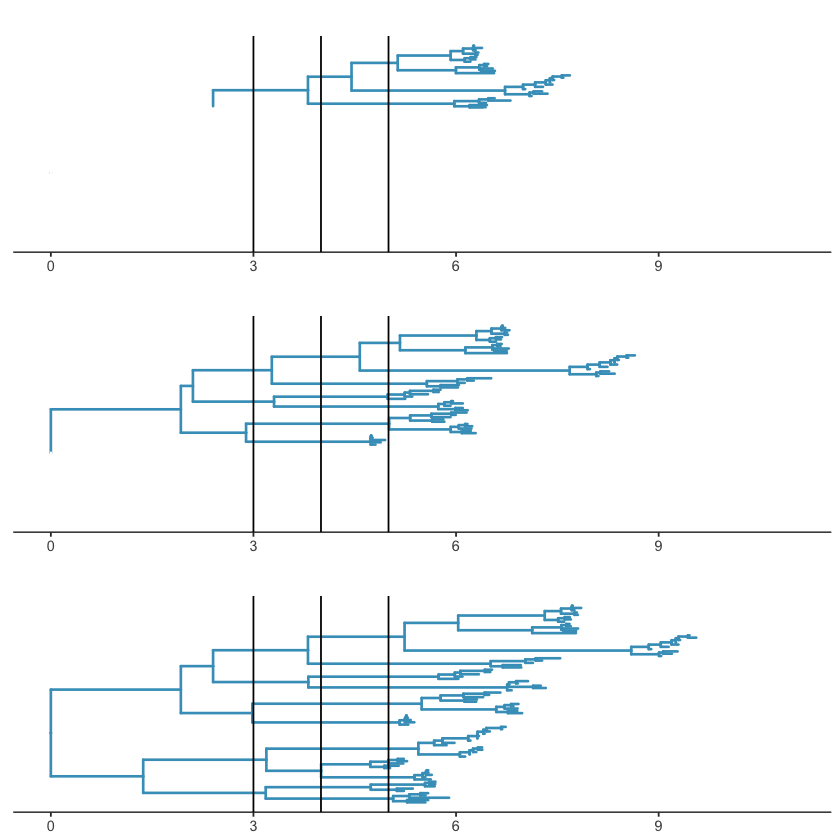

In [24]:
#### Trees (Doud)

light_blue = "#87C1D8"
dark_blue = "#25576B"

# myColors <- c(black,light_blue,blue,dark_blue)
myColors <- c(blue,blue, "white", "white")
fillScale <- scale_fill_manual(name = "Group", values = myColors)
colorScale <- scale_color_manual(name = "Group", values = myColors)

tree_low <- make_tree("_temp_low_graft_high.newick", "", colorScale)
tree_intermediate <- make_tree("_temp_intermediate_graft_high.newick", "", scale_color_manual(name = "Group", values = c(blue, blue, blue, "white")))
tree_high <- make_tree("../../analysis/HA/branch_lengths/phydms/WSN_high_0_ExpCM_HA_Doud_prefs_tree.newick", "",  scale_color_manual(name = "Group", values = c(blue, blue, blue, blue)))


g <- arrangeGrob(tree_low, tree_intermediate, tree_high, ncol=1) #generates g
tree_plot <- plot_grid(g)
tree_plot